<h1>10. Seaborn</h1>
<br>

## 10.1. Seaborn
+ Seaborn
  + Matplotlib 라이브러리를 기반으로 개발된 고급 통계 데이터 시각화 라이브러리
  + 다양한 테마와 통계 그래프를 지원하며, 시각적으로 세련된 그래프를 쉽게 생성할 수 있음
  + Matplotlib 라이브러리에 의존하므로, 사용 시 함께 불러와야 함

<br>

+ \[실습 데이터\]
  + 공공데이터포털에서 제공하는 2020년 국민건강보험공단 건강검진 정보
  + [health_2020.csv](./data/health_2020.csv)

<br>

|변수|설명|
|:---:|:------------|
|gender|성별 코드 (남자: 1, 여자: 2)|
|height|키 (5cm 단위)|
|weight|몸무기 (5cm 단위)|
|waist|허리둘레|
|systolic|수축기 혈압|
|diastolic|이완기 혈압|
|cholesterol|총콜레스테롤|
|HDL|HDL 콜레스테롤|
|LDL|LDL 콜레스테롤|
|smoking|흡연 상태 (비흡연: 1, 과거 흡연: 2, 현재 흡연: 3)|
|drinking|음주 여부 (비음주: 0, 음주: 1)|

<br>

## 10.2. 막대 그래프

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## 실습 데이터 : health_2020 데이터셋
data = pd.read_csv('./data/health_2020.csv')
print(data.head())

   no  city_code  gender  age_code  height  weight  waist  systolic  \
0   1         36       1         9     165      60   72.1       127   
1   5         41       2        12     155      50   75.2       144   
2   6         27       1         9     185      85   94.0       114   
3   7         44       1         9     165      80   93.0       112   
4   9         41       2        17     150      50   82.0       136   

   diastolic  blood_sugar  cholesterol  triglycerides   HDL  LDL  hemoglobin  \
0         79           90          188             58  58.0  118        15.0   
1         89          110          220            171  53.0  133        12.4   
2         72           86          234            183  50.0  147        16.4   
3         73          250          119            265  26.0   40        15.7   
4         65          104          177             61  63.0  101        13.3   

   serum  smoking  drinking  
0    1.1        1         0  
1    0.7        1         0  
2 

In [3]:
## 라벨 매핑(label mapping)
# replace() 함수는 명시되지 않은 값을 그대로 유지하지만,
# map() 함수는 명시되지 않은 값을 NaN으로 처리함
data6 = data.copy()
data6 = data6.loc[:, ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
data6['gender'] = data['gender'].replace({1: 'M', 2: 'F'})
data6['drinking'] = data['drinking'].replace({0: 'Non-drinking', 1: 'Drinking'})
data6['smoking'] = data['smoking'].replace({1: 'Non-smoking', 2: 'Quit-smoking', 3: 'Smoking'})
print(data6.head())

  gender  height  weight  waist      drinking      smoking
0      M     165      60   72.1  Non-drinking  Non-smoking
1      F     155      50   75.2  Non-drinking  Non-smoking
2      M     185      85   94.0      Drinking      Smoking
3      M     165      80   93.0      Drinking      Smoking
4      F     150      50   82.0  Non-drinking  Non-smoking


In [4]:
# 성별 음주 여부별 빈도
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()
print(drinking)

  gender      drinking  count
0      F      Drinking    611
1      F  Non-drinking    888
2      M      Drinking   1086
3      M  Non-drinking    415


In [5]:
# 성별 흡연 상태별 빈도
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()
print(smoking)

  gender       smoking  count
0      F   Non-smoking   1422
1      F  Quit-smoking     45
2      F       Smoking     32
3      M   Non-smoking    502
4      M  Quit-smoking    519
5      M       Smoking    480


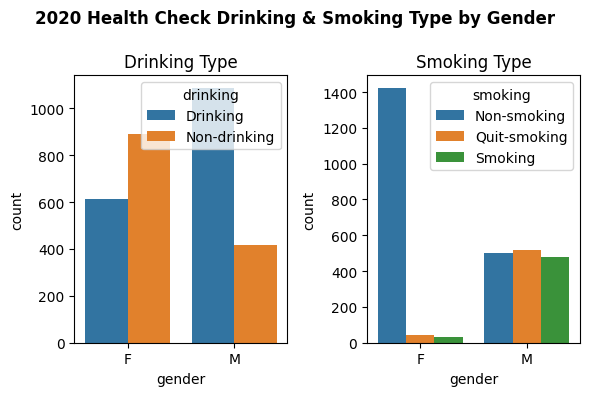

In [6]:
# 막대 그래프1 : 성별에 따른 음주 여부, 흡연 상태 분포
fig = plt.figure(figsize=(6, 4))
area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

ax1 = sns.barplot(x='gender', y='count', hue='drinking', data=drinking, ax=area1)
ax2 = sns.barplot(x='gender', y='count', hue='smoking', data=smoking, ax=area2)

fig.suptitle('2020 Health Check Drinking & Smoking Type by Gender', fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

In [7]:
# 성별 흡연 상태별 평균 몸무게
mean_weight = data6.groupby(['gender', 'smoking'])['weight'].mean()
mean_weight = mean_weight.to_frame(name='mean')
mean_weight = mean_weight.reset_index()
print(mean_weight)

  gender       smoking       mean
0      F   Non-smoking  55.706751
1      F  Quit-smoking  55.555556
2      F       Smoking  59.843750
3      M   Non-smoking  68.914343
4      M  Quit-smoking  70.337187
5      M       Smoking  69.052083


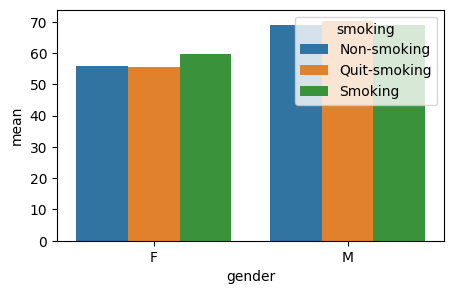

In [8]:
# 막대 그래프2 : 성별과 흡연 상태에 따른 평균 몸무게
plt.figure(figsize=(5, 3))
sns.barplot(x='gender', y='mean', hue='smoking', data=mean_weight)
plt.show()

<br>

## 10.3. 히스토그램

<br>

In [9]:
# 성별에 따라 데이터 분리
maledata = data6.copy()
maledata = maledata.loc[maledata['gender']=='M',:]

femaledata = data6.copy()
femaledata = femaledata.loc[femaledata['gender']=='F',:]

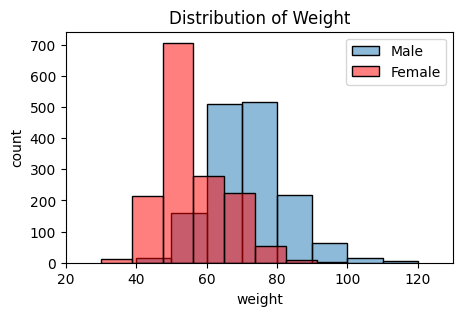

In [10]:
# 히스토그램1 : 성별에 따른 몸무게 분포
plt.figure(figsize=(5, 3))
plt.title('Distribution of Weight')
sns.histplot(maledata['weight'], bins=8, alpha=0.5, label='Male')
sns.histplot(femaledata['weight'], bins=8, alpha=0.5, label='Female', color='r')
plt.xlim(20, 130)
plt.xlabel('weight')
plt.ylabel('count')
plt.legend()
plt.show()

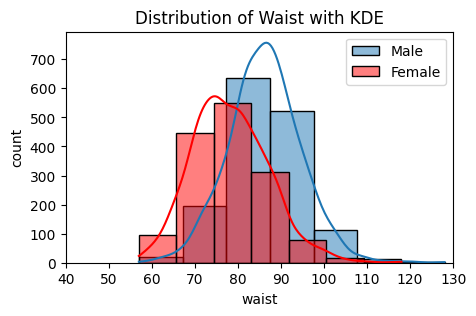

In [11]:
# 히스토그램 & 커널 밀도 추정(KDE) : 성별에 따른 허리둘레 분포
plt.figure(figsize=(5, 3))
plt.title('Distribution of Waist with KDE')
sns.histplot(maledata['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(femaledata['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)
plt.xlim(40,130)
plt.xlabel('waist')
plt.ylabel('count')
plt.legend()
plt.show()

<br>

## 10.4. 상자그림

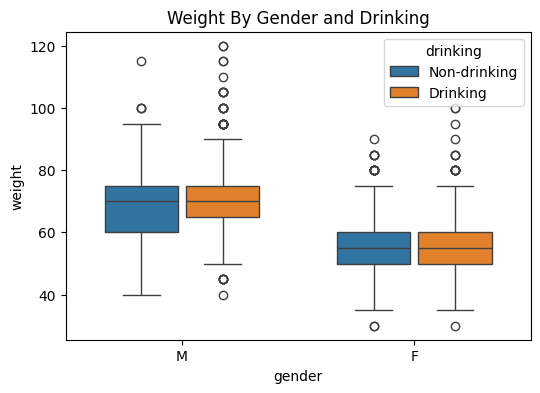

In [12]:
# 상자그림1 : 성별 및 음주 여부에 따른 몸무게 분포
plt.figure(figsize=(6, 4))
plt.title('Weight By Gender and Drinking')
sns.boxplot(x='gender', y='weight', hue='drinking', width=0.7, gap = 0.1, data=data6)
plt.show()

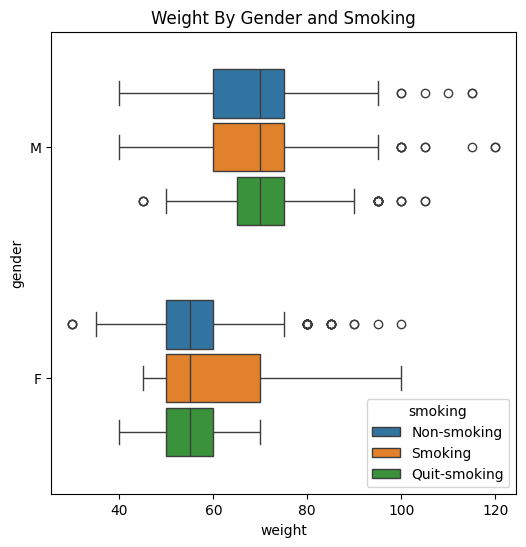

In [13]:
# 상자그림2 : 성별 및 흡연 상태에 따른 몸무게 분포
plt.figure(figsize=(6, 6))
plt.title('Weight By Gender and Smoking')
sns.boxplot(x='weight', y='gender', hue='smoking', width=0.7, gap=0.1, data=data6, orient='h')
plt.show()

<br>

## 10.5. 카운트 플롯(count plot)
- 범주형 변수의 각 항목별 빈도를 막대 그래프로 표현함
- 데이터의 범주별 분포를 직관적으로 파악할 수 있음

<br>

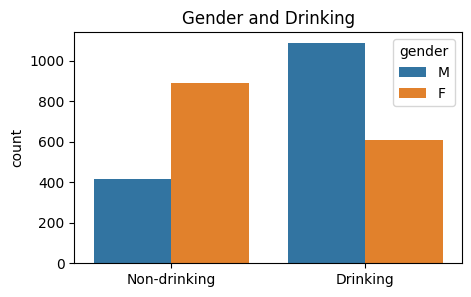

In [14]:
# 카운트 플롯1 : 음주 여부에 따른 성별 분포
plt.figure(figsize=(5, 3))
plt.title('Gender and Drinking')
sns.countplot(x='drinking', hue='gender', data=data6)
plt.xlabel('')
plt.show()

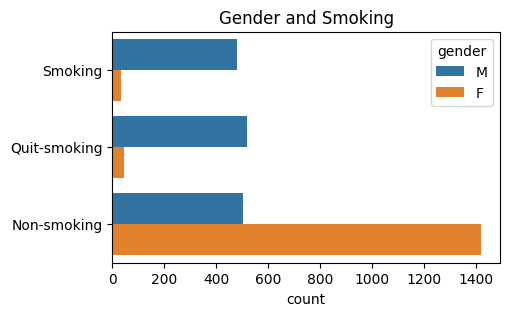

In [15]:
# 카운트 플롯2 : 흡연 상태에 따른 성별 분포
plt.figure(figsize=(5, 3))
plt.title('Gender and Smoking')
sns.countplot(y='smoking', hue='gender',
              data=data6, order=['Smoking', 'Quit-smoking', 'Non-smoking'])
plt.ylabel('')
plt.show()

<br>

## 10.6. 히트맵(heatmap)
- 행과 열로 이루어진 2차원 행렬 데이터를 색상으로 시각화함
- 두 범주형 변수 간의 관계나 상관관계를 나타낼 때 사용
- 색상의 강도를 통해 값의 크기를 비교할 수 있음
- (예) 상관행렬, 교차표 등

<br>

In [16]:
# 8개 건강 지표 선택
data8 = data.copy()
data8 = data8.loc[:, ['height', 'weight', 'waist',
                      'systolic', 'diastolic', 'cholesterol', 'HDL', 'LDL']]

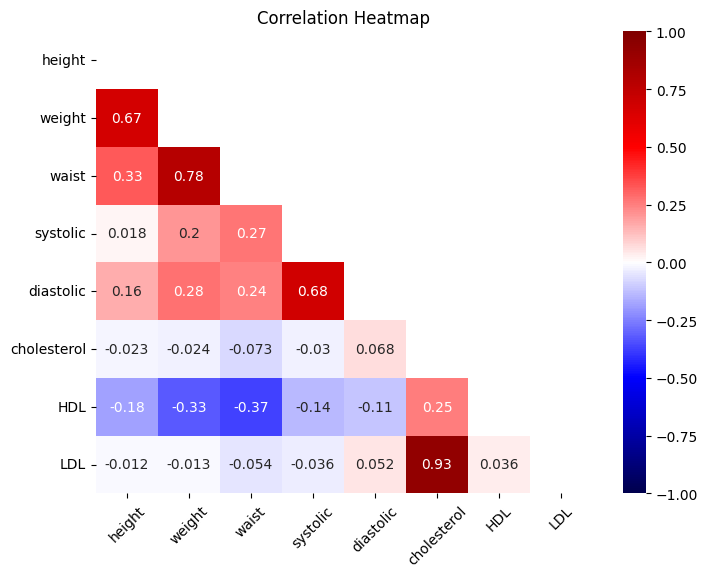

In [17]:
# 히트맵 : 8개의 건강 지표 간 상관관계
correlation_data8 = data8.corr()
upp_mat = np.triu(correlation_data8)

plt.figure(figsize=(8, 6))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_data8, annot=True, mask=upp_mat, cmap='seismic', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()